# Support Vector Machine 

## Paquetes 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

## Base de datos

Se procede a ingresar la base de datos a utilizar, así también como una descripción de la misma.

In [2]:
#descarga base 
df = pd.read_csv("diabetes.csv")

#descipción de la base.
df.describe().round()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,4.0,121.0,69.0,21.0,80.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,115.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,127.0,37.0,1.0,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.0,2.0,81.0,1.0


In [3]:
# Información de la base de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## División de la base de datos
Una vez que se depuró la base de datos, se procede a realizar la división de la misma en el set de entrenamiento y prueba. Además, se utilizará una división de 75-25 para el train y test respectivamente.

In [4]:
# Se extrae la variable a predecir del set de datos, en este caso Outcome. De esta forma quedan variables independientes de la
# variable a predecir.
# ==============================================================================
X = df.drop(["Outcome"],axis = 1)

Y = df.Outcome

X_train, X_test, Y_train, Y_test = train_test_split(
                                        X,
                                        Y,
                                        train_size   = 0.75,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

## SVM lineal


Primero, se utilizará su versión lineal.

In [5]:
modelo_lineal = SVC(C = 100, kernel = 'linear', random_state=123)
modelo_lineal.fit(X_train, Y_train)

SVC(C=100, kernel='linear', random_state=123)

In [6]:
# Predicciones test
# ==============================================================================
predicciones = modelo_lineal.predict(X_test)
predicciones

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [7]:
# Precisión de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = Y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"La precisión del test es: {100*accuracy}%")


La precisión del test es: 76.5625%


## SVM radial

Ahora, también se observará la predicción con la versión radial del modelo.

In [8]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

_ = grid.fit(X = X_train, y = Y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
10,20.691381,0.776042,0.018537,0.800347,0.003248
9,4.83293,0.772569,0.012992,0.791667,0.007666
13,1623.776739,0.767361,0.019642,0.860243,0.013835
11,88.586679,0.765625,0.023677,0.816840,0.006835
12,379.269019,0.762153,0.023421,0.833333,0.003683


In [9]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 20.6913808111479} : 0.7760416666666666 accuracy


In [10]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

In [11]:
# Precisón de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = Y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"La precisión del test es: {100*accuracy}%")


La precisión del test es: 74.47916666666666%


Con un modelo SVM de kernel radial se consigue clasificar correctamente el 76.62% de las observaciones de test. 

## Matriz de confusión de las predicciones de test

Gráfico de matriz de confusión para la versión lineal.

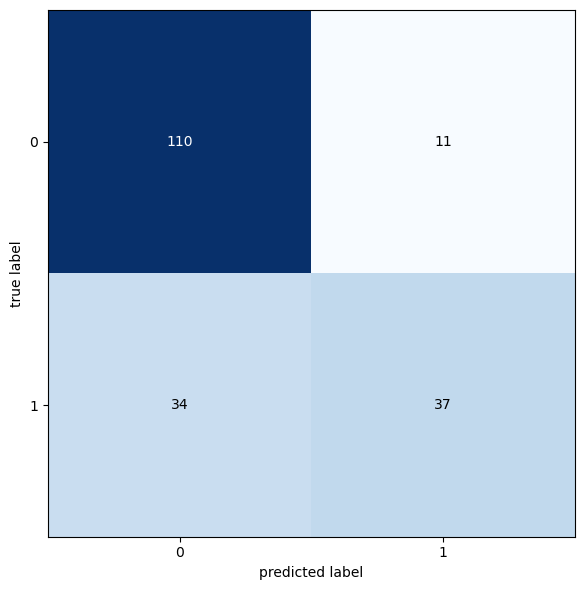

In [12]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Y_pred = modelo_lineal.predict(X_test)
matriz = confusion_matrix(Y_test,Y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

Gráfico de matriz de confusión para la versión radial.

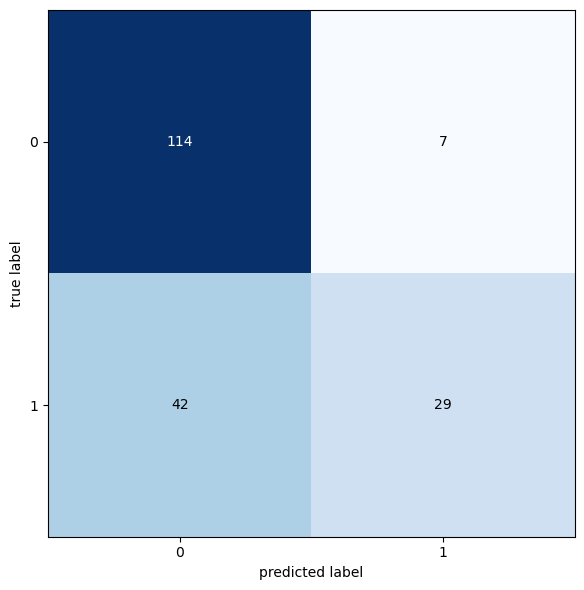

In [13]:
Y_pred = modelo.predict(X_test)
matriz = confusion_matrix(Y_test,Y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

# Importancia de las características

Primero, veamos la importancia de las características en el caso lineal.

In [14]:
# Obtener las importancias de características mediante permutación
result = permutation_importance(modelo_lineal, X, Y, n_repeats=10, random_state=123, n_jobs=2)

importancias = result.importances_mean

# Crear un DataFrame para visualizar las importancias
variables = X.columns
permutation_importancias_1 = pd.DataFrame({"Feature": variables, "Importance": importancias})
print(permutation_importancias_1)

                    Feature  Importance
0               Pregnancies    0.019792
1                   Glucose    0.140104
2             BloodPressure    0.013672
3             SkinThickness    0.002865
4                   Insulin    0.008203
5                       BMI    0.046745
6  DiabetesPedigreeFunction    0.022266
7                       Age    0.000911


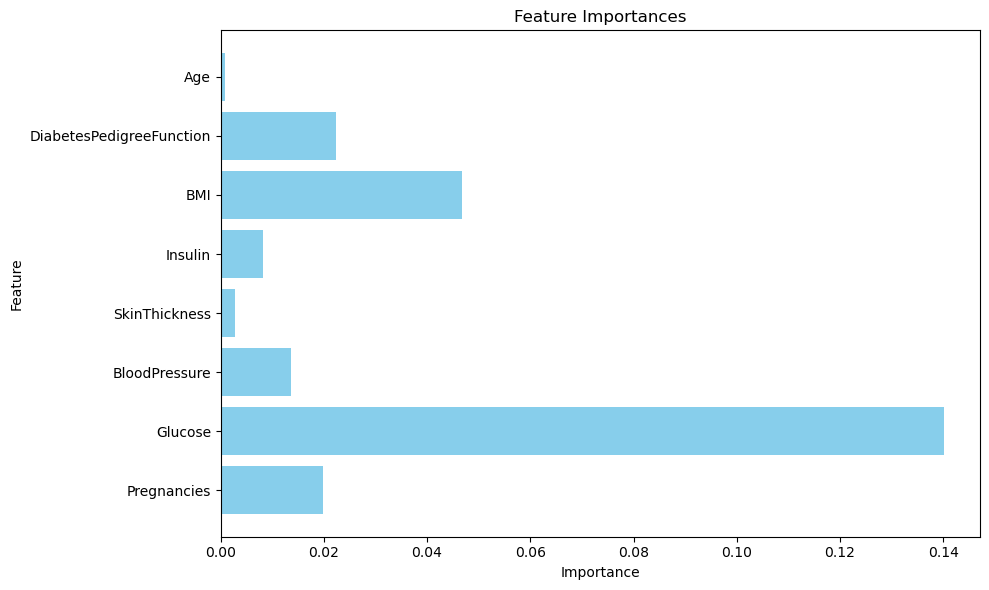

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(permutation_importancias_1["Feature"], permutation_importancias_1["Importance"], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

Ahora, veamos la importancia de las características en el caso radial.

In [16]:
# Obtener las importancias de características mediante permutación
result = permutation_importance(modelo, X, Y, n_repeats=10, random_state=123, n_jobs=2)

importancias = result.importances_mean

# Crear un DataFrame para visualizar las importancias
variables = X.columns
permutation_importancias = pd.DataFrame({"Feature": variables, "Importance": importancias})
print(permutation_importancias)

                    Feature  Importance
0               Pregnancies    0.004297
1                   Glucose    0.144010
2             BloodPressure    0.008464
3             SkinThickness    0.005729
4                   Insulin    0.021484
5                       BMI    0.025391
6  DiabetesPedigreeFunction   -0.001302
7                       Age    0.007552


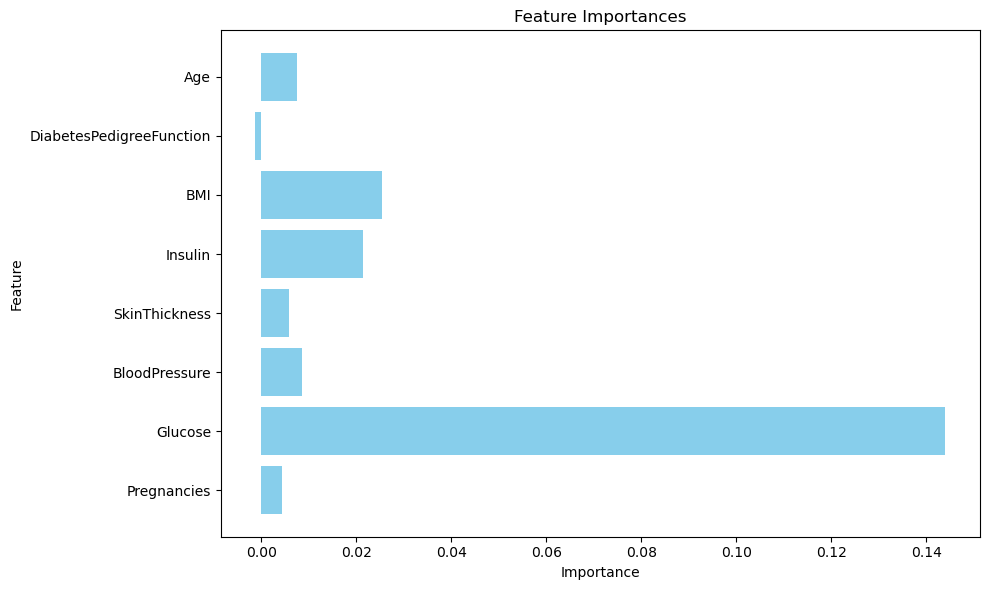

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(permutation_importancias["Feature"], permutation_importancias["Importance"], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()